# **Simple Linear Regression**

### Importing All Necessary Libraries

In [1]:
# Importing all dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import math
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

### Data Loading

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# Check data shape
df.shape

(30, 2)

In [4]:
# Check null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Plotting regression line to know the relationship between YearsExperience and Salaries

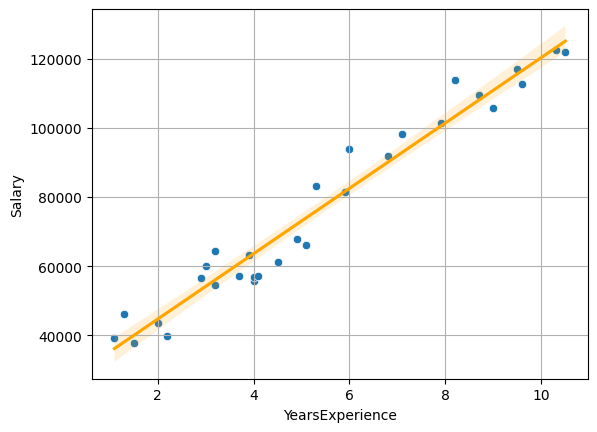

In [6]:
# Scatter plot of 'YearsExperience' on the x-axis and 'Salary' on the y-axis
sns.scatterplot(x=df['YearsExperience'], y=df['Salary'])
# Overlaying a regression line on the scatter plot
sns.regplot(x=df['YearsExperience'], y=df['Salary'], color='orange', scatter=False)
plt.grid(True)
plt.show()

### Selecting and reshaping the features (X) and target variable (y)

In [7]:
X = np.array(df['YearsExperience']).reshape(-1, 1)
y = np.array(df['Salary']).reshape(-1, 1)

### Initialize and train the linear regression model

In [8]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

### Making predictions

In [9]:
y_pred = model.predict(X)

### Calculating Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and Calculating R-squared value

In [10]:
mse = mean_squared_error(y, y_pred)
print('Mean Squared Error (MSE):', mse)
rmse = math.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse) 
r_squared = model.score(X, y)
print("R-squared value:", r_squared)

Mean Squared Error (MSE): 31270951.722280968
Root Mean Squared Error (RMSE): 5592.043608760662
R-squared value: 0.9569566641435086


Here's a concise summary of the metrics for evaluating the model:

Mean Squared Error (MSE): 31,270,951.72. Lower values indicate a better fit, but it's not directly intuitive due to its squared nature relative to the target variable (salary).

Root Mean Squared Error (RMSE): 5,592.04. It estimates the average error in salary prediction, directly in salary units.

R-squared (R²): 0.957. Indicates that 95.7% of salary variance is explained by the model, suggesting a very good fit.

Conclusion:
R-squared (R²): With a high value of 0.957, the model explains a significant portion of salary variance.

RMSE: At 5,592.04, the average prediction error in salary is context-dependent; it may be acceptable in a broader salary range but larger in a narrower one.

### Residuals Plotting to get errror b/w predicted and observed actual values and Highlight outliers

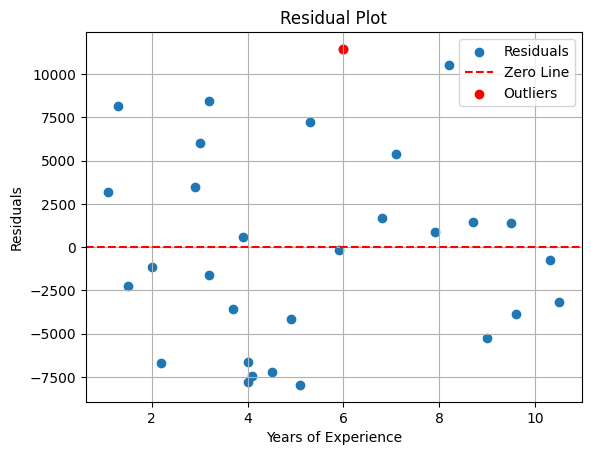

In [11]:
residuals = y - y_pred
# Calculate mean and standard deviation of residuals
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

# Identify outliers (e.g., points beyond 2 standard deviations from the mean)
threshold = 2 * std_residual
outliers = [(x, y) for x, y in zip(df['YearsExperience'], residuals) if abs(y - mean_residual) > threshold]

# Plot residuals
plt.scatter(df['YearsExperience'], residuals, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Highlight outliers
if outliers:
    outlier_months, outlier_values = zip(*outliers)
    plt.scatter(outlier_months, outlier_values, color='red', label='Outliers')

plt.xlabel('Years of Experience')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.grid()
plt.show()

From the given plot:

1. There is a random scatter of residuals around the zero line, which is good. (model's predictions are unbiased)
2. The The absence of a clear pattern (appropriately capturing the relationship b/w independent and dependent variable) indicates model does not have a systematic bias.
3. There are a few points that are further away from the zero line, which might be potential outliers. (outliers can disproportionately influence the results of the analysis and might indicate data entry errors)
4. The spread of residuals seems relatively consistent across the range of months of experience, suggesting homoscedasticity (residuals variance is constant across all levels of the independent variable).

Overall, the residual plot suggests that the model's assumptions are reasonably met, although further investigation into the potential outliers might be necessary.

### Perform cross-validation

cross-validated RMSE scores provide a more accurate and reliable assessment of a model’s predictive ability, helping in making informed decisions about deploying the model in practical applications.

In [12]:
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cross_val_rmse = [np.sqrt(-score) for score in cross_val_scores]

print("Cross-validated RMSE scores:", cross_val_rmse)
print("Average Cross-validated RMSE:", np.mean(cross_val_rmse))

Cross-validated RMSE scores: [5089.709104622777, 5565.489196699221, 7731.795530041835, 8271.459255661368, 5980.529929668278]
Average Cross-validated RMSE: 6527.7966033386965


The above average cross-validated RMSE of 6527.7966 indicates that, on average, the model's predictions are about 6527.7966 units off from the actual values. This metric provides a general sense of the model's predictive accuracy across different data subsets.

### **Prediction**
We will predict the Salary by giving an input of Years of Experience

In [17]:
print('Model\'s Prediction of Salary: ', model.predict([[10.1]]))

Model's Prediction of Salary:  [[121236.81964536]]
